In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime


In [37]:

df = pd.read_csv('stepcountdata.csv', sep=',', skiprows=1)  

# İlk 5 satıra bakarak veriyi kontrol edelim
df.head()


,type,sourceName,sourceVersion,productType,device,startDate,endDate,unit,value
0,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,14.6,"iPhone12,1","<<HKDevice: 0x30129c320>, name:iPhone, manufac...",2021-08-12 18:40:13 +0000,2021-08-12 18:40:15 +0000,count,11.0
1,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,14.6,"iPhone12,1","<<HKDevice: 0x30129c320>, name:iPhone, manufac...",2021-08-12 19:16:52 +0000,2021-08-12 19:16:57 +0000,count,13.0
2,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,14.6,"iPhone12,1","<<HKDevice: 0x30129c320>, name:iPhone, manufac...",2021-08-12 19:33:09 +0000,2021-08-12 19:39:08 +0000,count,41.0
3,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,14.6,"iPhone12,1","<<HKDevice: 0x30129c320>, name:iPhone, manufac...",2021-08-12 19:47:47 +0000,2021-08-12 19:47:52 +0000,count,8.0
4,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,14.6,"iPhone12,1","<<HKDevice: 0x30129c320>, name:iPhone, manufac...",2021-08-12 21:06:30 +0000,2021-08-12 21:06:33 +0000,count,1.0


In [38]:
# Kolon tipleri, eksik değerler
df.info()

# Eksik veri sayısını kontrol et
print("Eksik veri sayısı (her kolon için):")
print(df.isnull().sum())

# Eksik veriler varsa doldurma veya silme işlemi
if df.isnull().sum().any():  # Eğer herhangi bir eksik veri varsa
    df.fillna(df.mean(), inplace=True)  # Eksik verileri ortalama ile doldur
    print("Eksik veriler ortalama ile dolduruldu.")

# Sayısal kolonların istatistiksel özeti
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43031 entries, 0 to 43030
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   type           43031 non-null  object 
 1   sourceName     43031 non-null  object 
 2   sourceVersion  43031 non-null  object 
 3   productType    43031 non-null  object 
 4   device         43031 non-null  object 
 5   startDate      43031 non-null  object 
 6   endDate        43031 non-null  object 
 7   unit           43031 non-null  object 
 8   value          43031 non-null  float64
dtypes: float64(1), object(8)
memory usage: 3.0+ MB
Eksik veri sayısı (her kolon için):
type             0
sourceName       0
sourceVersion    0
productType      0
device           0
startDate        0
endDate          0
unit             0
value            0
dtype: int64


,value
count,43031.000000
mean,211.133369
std,230.021358
min,1.000000
25%,40.000000
50%,124.000000
75%,303.000000
max,1286.000000


C:\Users\takte\AppData\Local\Temp\ipykernel_16212\1756434764.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='Blues')


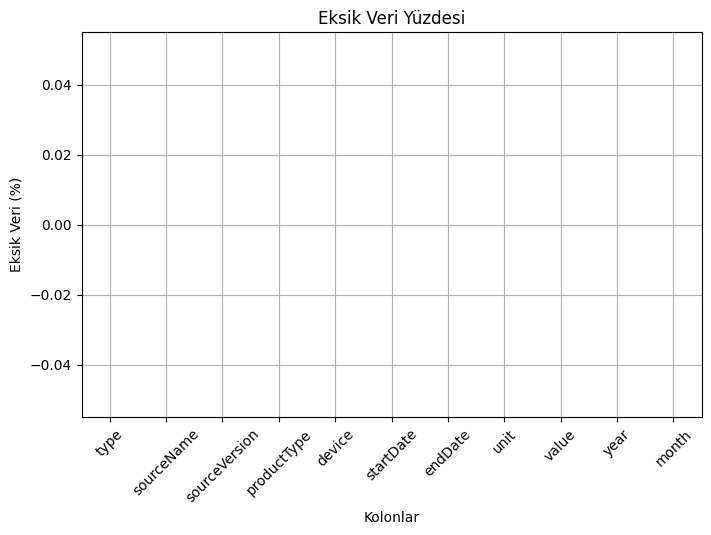

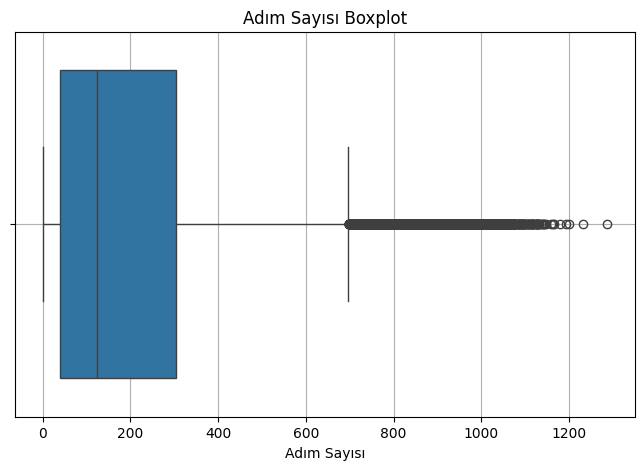

In [67]:
# Eksik veri yüzdesini görselleştirelim
missing_percentage = df.isnull().sum() / len(df) * 100
plt.figure(figsize=(8, 5))
sns.barplot(x=missing_percentage.index, y=missing_percentage.values, palette='Blues')
plt.title('Eksik Veri Yüzdesi')
plt.xlabel('Kolonlar')
plt.ylabel('Eksik Veri (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Adım sayısının boxplot grafiği (outlier analizi)
plt.figure(figsize=(8, 5))
sns.boxplot(x=df['value'])
plt.title('Adım Sayısı Boxplot')
plt.xlabel('Adım Sayısı')
plt.grid(True)
plt.show()


In [39]:
# startDate ve endDate kolonlarını datetime formatına çevirelim
df['startDate'] = pd.to_datetime(df['startDate'])
df['endDate'] = pd.to_datetime(df['endDate'])


In [40]:
# startDate içinden yıl ve ay bilgilerini ek kolonlar olarak çıkaralım
df['year'] = df['startDate'].dt.year
df['month'] = df['startDate'].dt.month


In [41]:
# 2022 ile 2024 arasındaki verileri filtreleyelim
df_filtered = df[(df['year'] >= 2022) & (df['year'] <= 2024)].copy()

df_filtered.head()


,type,sourceName,sourceVersion,productType,device,startDate,endDate,unit,value,year,month
4004,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,15.0.2,"iPhone12,1","<<HKDevice: 0x301220500>, name:iPhone, manufac...",2022-01-01 00:14:35+00:00,2022-01-01 00:14:58+00:00,count,18.0,2022,1
4005,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,15.0.2,"iPhone12,1","<<HKDevice: 0x301220500>, name:iPhone, manufac...",2022-01-01 01:27:29+00:00,2022-01-01 01:27:31+00:00,count,16.0,2022,1
4006,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,15.0.2,"iPhone12,1","<<HKDevice: 0x301220500>, name:iPhone, manufac...",2022-01-01 01:45:42+00:00,2022-01-01 01:46:18+00:00,count,46.0,2022,1
4007,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,15.0.2,"iPhone12,1","<<HKDevice: 0x301220500>, name:iPhone, manufac...",2022-01-01 03:52:25+00:00,2022-01-01 03:52:28+00:00,count,1.0,2022,1
4008,HKQuantityTypeIdentifierStepCount,Toprak iPhone’u,15.0.2,"iPhone12,1","<<HKDevice: 0x301220500>, name:iPhone, manufac...",2022-01-01 04:06:05+00:00,2022-01-01 04:10:01+00:00,count,117.0,2022,1


C:\Users\takte\AppData\Local\Temp\ipykernel_16212\2682310597.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekly_avg.index, y=weekly_avg.values, palette='viridis')


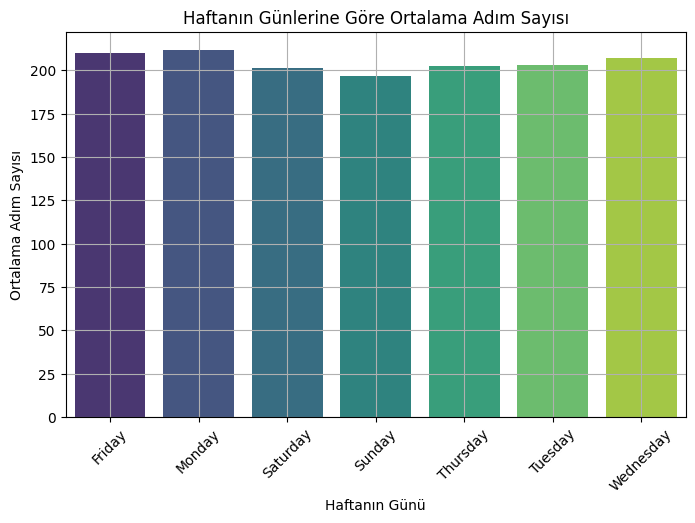

In [42]:
# Haftanın gününü ekleyelim
df_filtered['day_of_week'] = df_filtered['startDate'].dt.day_name()

# Haftanın günlerine göre ortalama adım sayısını hesaplayalım
weekly_avg = df_filtered.groupby('day_of_week')['value'].mean()

# Haftanın günlerine göre ortalama adım sayısını görselleştirelim
plt.figure(figsize=(8, 5))
sns.barplot(x=weekly_avg.index, y=weekly_avg.values, palette='viridis')
plt.title('Haftanın Günlerine Göre Ortalama Adım Sayısı')
plt.xlabel('Haftanın Günü')
plt.ylabel('Ortalama Adım Sayısı')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()


In [43]:
# Yıl ve aya göre gruplayıp adım sayılarını toplayalım
monthly = df_filtered.groupby(['year', 'month'])['value'].sum().reset_index()
monthly.head()




,year,month,value
0,2022,1,123604.0
1,2022,2,171527.0
2,2022,3,252869.0
3,2022,4,242254.0
4,2022,5,267890.0


C:\Users\takte\AppData\Local\Temp\ipykernel_16212\1856260936.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm')


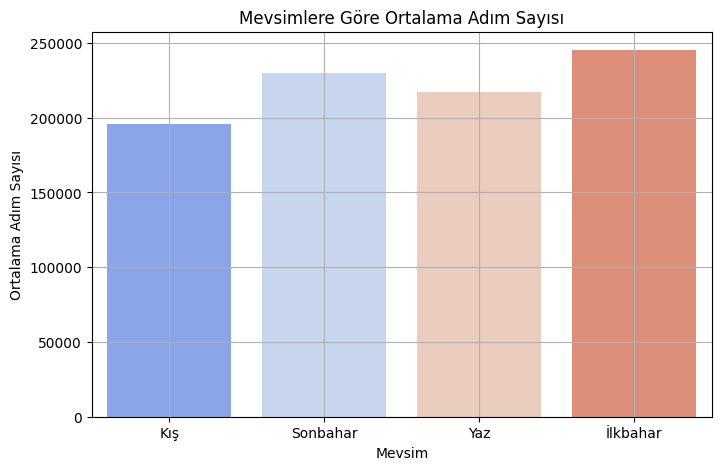

In [44]:
# Mevsimleri belirlemek için bir fonksiyon tanımlayalım
def get_season(month):
    if month in [12, 1, 2]:
        return 'Kış'
    elif month in [3, 4, 5]:
        return 'İlkbahar'
    elif month in [6, 7, 8]:
        return 'Yaz'
    else:
        return 'Sonbahar'

# Mevsim sütununu ekleyelim
monthly['season'] = monthly['month'].apply(get_season)

# Mevsimlere göre ortalama adım sayısını hesaplayalım
seasonal_avg = monthly.groupby('season')['value'].mean()

# Mevsimlere göre ortalama adım sayısını görselleştirelim
plt.figure(figsize=(8, 5))
sns.barplot(x=seasonal_avg.index, y=seasonal_avg.values, palette='coolwarm')
plt.title('Mevsimlere Göre Ortalama Adım Sayısı')
plt.xlabel('Mevsim')
plt.ylabel('Ortalama Adım Sayısı')
plt.grid(True)
plt.show()


In [70]:
from scipy.stats import f_oneway

# Mevsimler arasındaki farklılığı ANOVA testi ile kontrol edelim
kış = monthly[monthly['season'] == 'Kış']['value']
ilkbahar = monthly[monthly['season'] == 'İlkbahar']['value']
yaz = monthly[monthly['season'] == 'Yaz']['value']
sonbahar = monthly[monthly['season'] == 'Sonbahar']['value']

anova_result = f_oneway(kış, ilkbahar, yaz, sonbahar)
print(f"ANOVA Testi Sonucu: F-değeri = {anova_result.statistic}, p-değeri = {anova_result.pvalue}")


ANOVA Testi Sonucu: F-değeri = 1.624671506892181, p-değeri = 0.20304354280356923


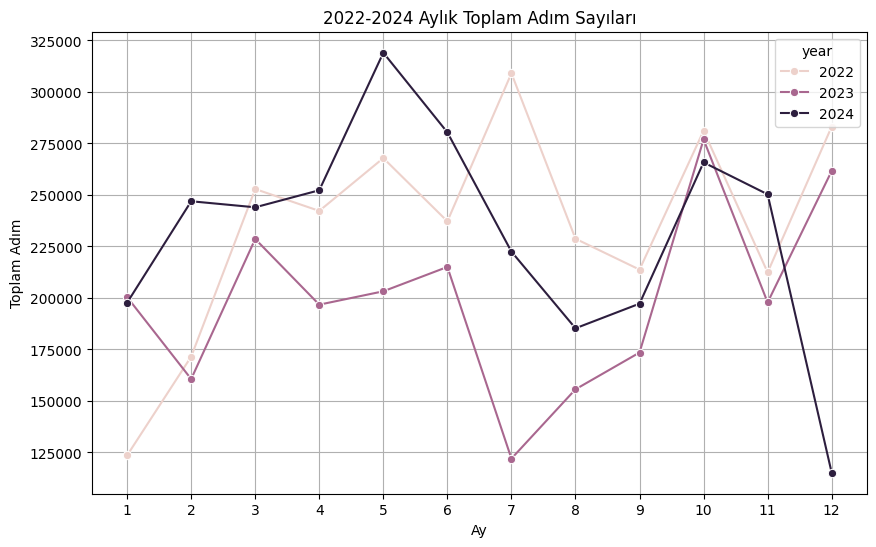

In [45]:
plt.figure(figsize=(10,6))
sns.lineplot(data=monthly, x='month', y='value', hue='year', marker='o')
plt.title('2022-2024 Aylık Toplam Adım Sayıları')
plt.xlabel('Ay')
plt.ylabel('Toplam Adım')
plt.xticks(range(1,13))
plt.grid(True)
plt.show()


In [69]:
import seaborn as sns
import matplotlib.pyplot as plt


In [47]:
# year-month ten bir tarih oluşturup index olarak atayalım
monthly['date'] = pd.to_datetime(monthly['year'].astype(str) + '-' + monthly['month'].astype(str))
monthly_ts = monthly.set_index('date').sort_index()

monthly_ts.head()


,year,month,value,season
date,,,,
2022-01-01,2022,1,123604.0,Kış
2022-02-01,2022,2,171527.0,Kış
2022-03-01,2022,3,252869.0,İlkbahar
2022-04-01,2022,4,242254.0,İlkbahar
2022-05-01,2022,5,267890.0,İlkbahar


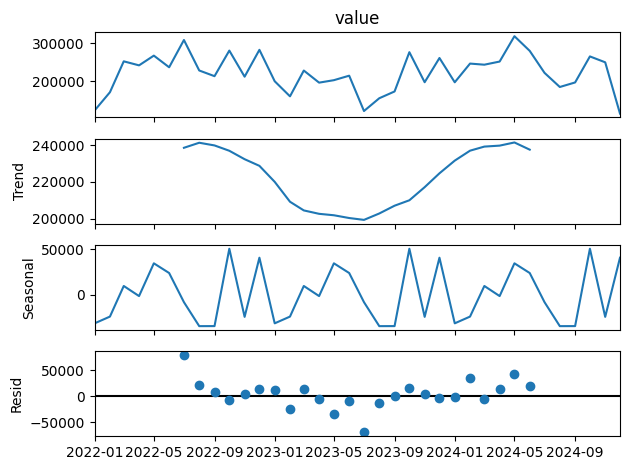

In [48]:
from statsmodels.tsa.seasonal import seasonal_decompose

# 12 aylık period varsayımı (1 yıllık döngü)
result = seasonal_decompose(monthly_ts['value'], model='additive', period=12)
result.plot()
plt.show()


In [49]:
# Pivot yaparak her yılın ay bazındaki adım sayısını karşılaştırmalı tabloya dönüştürelim
pivoted = monthly.pivot(index='month', columns='year', values='value')
pivoted


year,2022,2023,2024
month,,,
1,123604.0,200418.0,197709.0
10,281164.0,276947.0,265801.0
11,212430.0,197838.0,250307.0
12,283161.0,261637.0,115182.0
2,171527.0,160657.0,246939.0
3,252869.0,228628.0,244009.0
4,242254.0,196752.0,252282.0
5,267890.0,203240.0,319036.0
6,237204.0,215061.0,280379.0


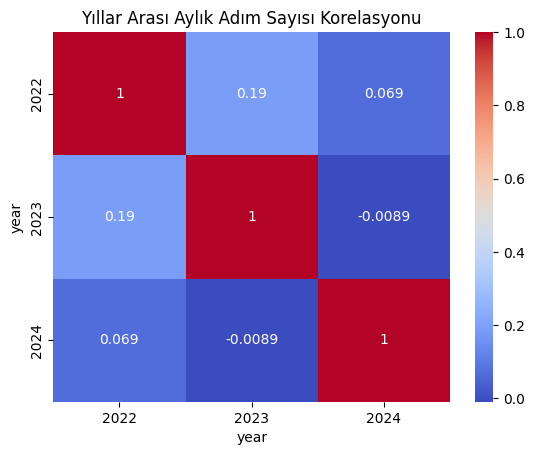

In [50]:
# Korelasyon ısı haritası
corr = pivoted.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Yıllar Arası Aylık Adım Sayısı Korelasyonu')
plt.show()


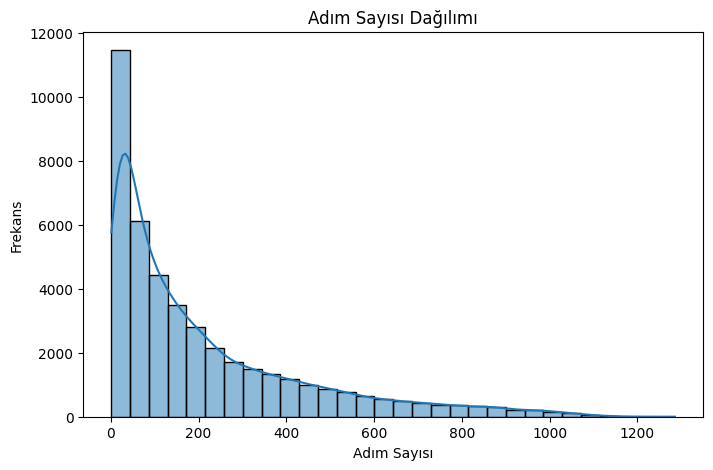

In [51]:
# Adım sayısının genel dağılımını görselleştirelim
plt.figure(figsize=(8, 5))
sns.histplot(df['value'], bins=30, kde=True)
plt.title('Adım Sayısı Dağılımı')
plt.xlabel('Adım Sayısı')
plt.ylabel('Frekans')
plt.show()


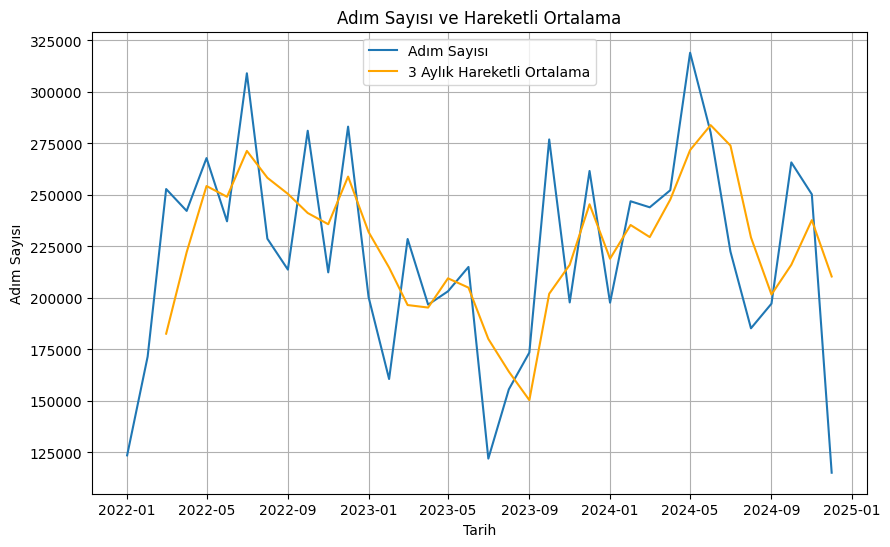

In [52]:
# 3 aylık hareketli ortalama
monthly_ts['3_months_avg'] = monthly_ts['value'].rolling(window=3).mean()

plt.figure(figsize=(10, 6))
plt.plot(monthly_ts.index, monthly_ts['value'], label='Adım Sayısı')
plt.plot(monthly_ts.index, monthly_ts['3_months_avg'], label='3 Aylık Hareketli Ortalama', color='orange')
plt.title('Adım Sayısı ve Hareketli Ortalama')
plt.xlabel('Tarih')
plt.ylabel('Adım Sayısı')
plt.legend()
plt.grid(True)
plt.show()


In [55]:
# Tarih bilgilerini ayrı özellikler olarak çıkaralım
monthly_ts['year'] = monthly_ts.index.year
monthly_ts['month'] = monthly_ts.index.month
monthly_ts['day'] = monthly_ts.index.day

# Özellikleri ve hedef değişkeni belirleyelim
X = monthly_ts[['year', 'month', 'day']].values  # X artık yıl, ay ve gün bilgilerini içeriyor
y = monthly_ts['value'].values


In [56]:
from sklearn.model_selection import train_test_split

# Veriyi eğitim ve test seti olarak ayıralım
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Lineer Regresyon Mean Absolute Error: 43332.406753193354
Lineer Regresyon R² Skoru: -0.5358006816078182


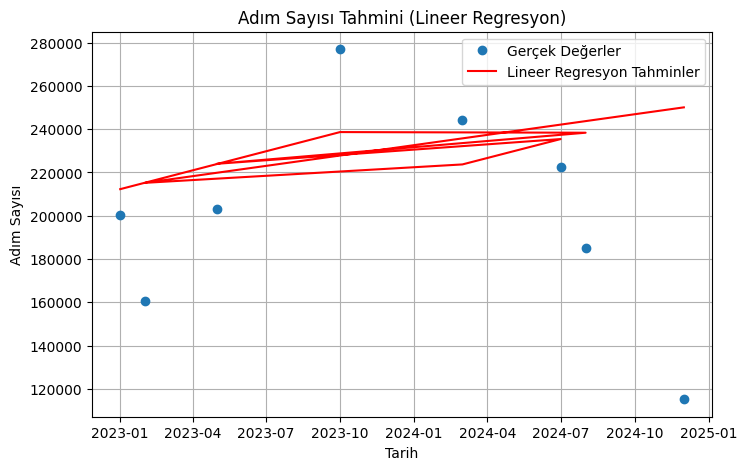

In [66]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score

# Lineer regresyon modeli oluştur ve eğit
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

# Tahmin yap
y_pred_lr = lr_model.predict(X_test)

# Hata hesapla
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)
print(f'Lineer Regresyon Mean Absolute Error: {mae_lr}')
print(f'Lineer Regresyon R² Skoru: {r2_lr}')

# Gerçek ve tahmin değerlerini görselleştir
plt.figure(figsize=(8, 5))
plt.plot(test_dates, y_test, 'o', label='Gerçek Değerler')
plt.plot(test_dates, y_pred_lr, 'r-', label='Lineer Regresyon Tahminler')
plt.title('Adım Sayısı Tahmini (Lineer Regresyon)')
plt.xlabel('Tarih')
plt.ylabel('Adım Sayısı')
plt.legend()
plt.grid(True)
plt.show()
